# Audio Activity correlation detector
#### This is a simple application on Root-Mean- Square energy (RMS) and Spectral energy features for audio signal processing to match a certain audio signal with a long signal and detect when it happened in this long signal. It was a fun idea to detect the sound of a character in a game called dead by daylight in a gameplay video of a famous youtuber. However I was lazy to search for the sound of this character in the whole video so I automated the process instead. 


In [1]:
import numpy as np
from moviepy.editor import * 
import librosa.display
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf 

## get the signals

In [23]:
clown, sr=librosa.load('clownTerrorRadius.wav')
##to trim the heading and leading of the signal
audioClip,_=librosa.load('clown audio.mp3')
clown,_=librosa.effects.trim(clown)
audioClip,_=librosa.effects.trim(audioClip)

In [30]:
#first make the amplitudes of the long signal and the template the same range for the calculation of energies to be suitable. 
maxAmpAudio=max(audioClip)
minAmpAudio=min(audioClip)

for i in range(len(clown)):
    if clown[i]> maxAmpAudio:
        clown[i]=maxAmpAudio
    elif clown[i]<minAmpAudio:
        clown[i]=minAmpAudio
sf.write('ampClown.wav',clown,sr)

## visualize the signals in the time domain

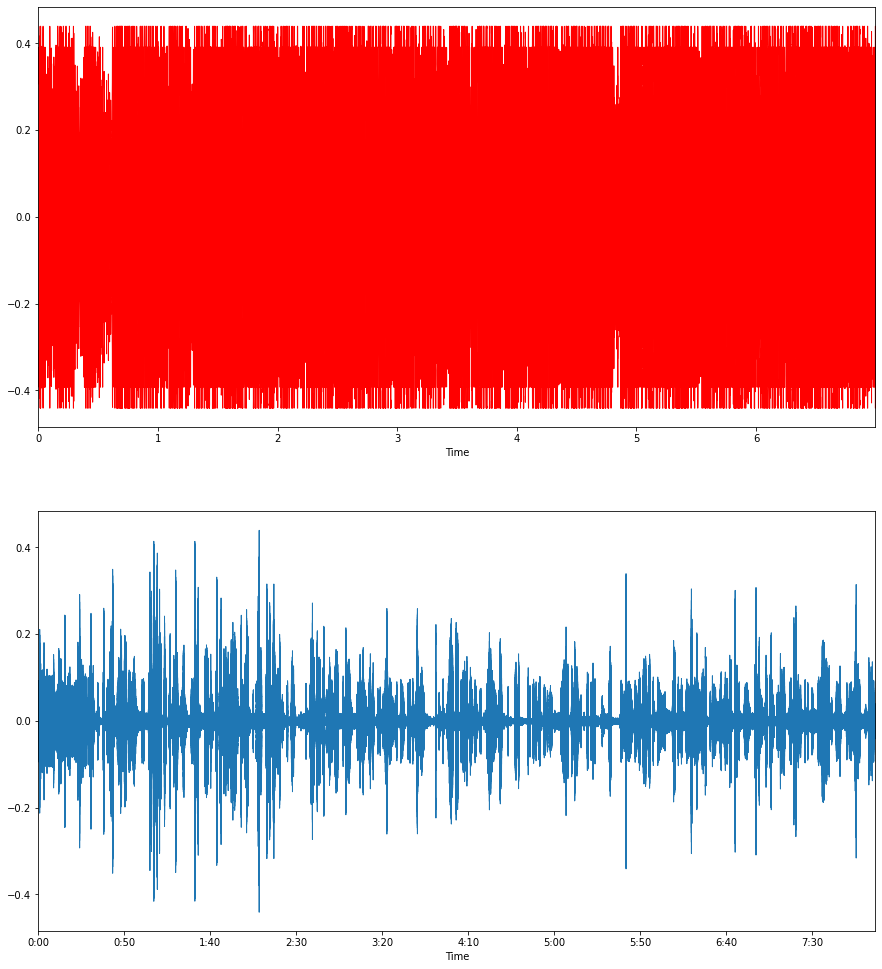

In [31]:
plt.figure(figsize=(15,17))
plt.subplot(2,1,1,)
librosa.display.waveplot(clown,color='r')
plt.subplot(2,1,2)
librosa.display.waveplot(audioClip)
plt.show()


# RMS calculation for template and the main long signal

In [32]:
## frame size is equal to the template duration size
frameSize=len(clown)

rmsClown=np.sqrt(np.sum((clown**2))/frameSize)


In [37]:
clownDuration=librosa.get_duration(clown)
rmsDiff=[]

def getRMS():

    ## calculating RMS for every frame in the long signal and appending the difference between the template signal and the long signal to the rmsDifference list
    for i in range(0,len(audioClip),frameSize):
        rmsAudio=np.sqrt(np.sum(audioClip[i:(i+frameSize)]**2)/frameSize)
        rmsDiff.append(np.abs(rmsAudio-rmsClown))
    return rmsDiff

## then argsort them to get which frames had the least difference
## convert the frame index to hour,min,sec representation
def timer(clownDuration,rmsDiff):
    argRmsDiff=np.argsort(rmsDiff)
    argRmsDiff=list(argRmsDiff)
    for j in range(len(argRmsDiff)):
        hr=int((argRmsDiff[j]*clownDuration)/1200)
        mint=int((argRmsDiff[j]*clownDuration)/60)
        sec=int(((argRmsDiff[j]*clownDuration/60)-mint)*60)
        argRmsDiff[j]='{hr}:{mint}:{sec}'.format(hr=hr,mint=mint,sec=sec)
    return argRmsDiff
rmsDiff=getRMS()
argRmsDiff=timer(clownDuration,rmsDiff)
print(argRmsDiff)


['0:1:3', '0:1:45', '0:2:6', '0:3:58', '0:1:23', '0:1:30', '0:0:42', '0:2:13', '0:1:52', '0:1:38', '0:0:49', '0:7:14', '0:1:10', '0:6:31', '0:1:17', '0:2:34', '0:0:21', '0:0:35', '0:6:53', '0:6:39', '0:3:37', '0:2:54', '0:2:47', '0:7:34', '0:4:18', '0:5:43', '0:4:4', '0:0:0', '0:5:0', '0:7:48', '0:4:46', '0:0:28', '0:0:14', '0:3:30', '0:7:0', '0:7:6', '0:4:26', '0:0:7', '0:5:35', '0:3:1', '0:2:40', '0:3:15', '0:5:49', '0:2:27', '0:6:17', '0:6:25', '0:7:20', '0:7:28', '0:6:11', '0:3:44', '0:5:57', '0:7:42', '0:6:46', '0:5:8', '0:1:59', '0:0:56', '0:6:3', '0:3:8', '0:5:29', '0:4:12', '0:3:23', '0:7:56', '0:4:54', '0:2:20', '0:5:15', '0:4:32', '0:3:51', '0:8:3', '0:5:21', '0:4:40']


## Spectral Centroid Calculation in the Frequency Domain

In [38]:
spClown=librosa.feature.spectral_centroid(y=clown,sr=sr,n_fft=frameSize, hop_length=frameSize)[0]
spAudioClip=librosa.feature.spectral_centroid(y=audioClip,sr=sr,n_fft=frameSize, hop_length=frameSize)[0]
spClown=list(spClown)
spAudioClip=list(spAudioClip)
spAudioClip=np.abs(spAudioClip-spClown[0])
argRmsDiff=timer(clownDuration,spAudioClip)
print(argRmsDiff)

['0:2:34', '0:6:53', '0:1:17', '0:6:39', '0:2:6', '0:7:42', '0:3:51', '0:6:11', '0:1:30', '0:4:40', '0:4:26', '0:4:18', '0:1:45', '0:0:56', '0:3:44', '0:5:0', '0:5:35', '0:4:4', '0:0:14', '0:1:3', '0:5:49', '0:7:34', '0:0:42', '0:1:59', '0:2:54', '0:3:23', '0:3:30', '0:1:10', '0:5:15', '0:6:17', '0:6:46', '0:4:12', '0:2:27', '0:3:37', '0:7:28', '0:7:20', '0:4:32', '0:5:57', '0:7:0', '0:6:31', '0:0:49', '0:5:43', '0:7:48', '0:4:54', '0:2:40', '0:6:3', '0:2:47', '0:2:13', '0:4:46', '0:2:20', '0:3:1', '0:0:0', '0:8:3', '0:7:6', '0:3:15', '0:0:35', '0:3:8', '0:5:21', '0:0:28', '0:0:7', '0:1:52', '0:7:56', '0:6:25', '0:0:21', '0:1:38', '0:5:29', '0:5:8', '0:7:14', '0:1:23', '0:3:58']
